In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import country_converter as coco
import statsmodels
import ast
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import yake
from collections import Counter
#Data Vis setting
%matplotlib inline
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

In [3]:
titles = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
titles.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
movies = titles.merge(credits,on='title')

Text(0.5, 1.0, 'Missing Values Matrix')

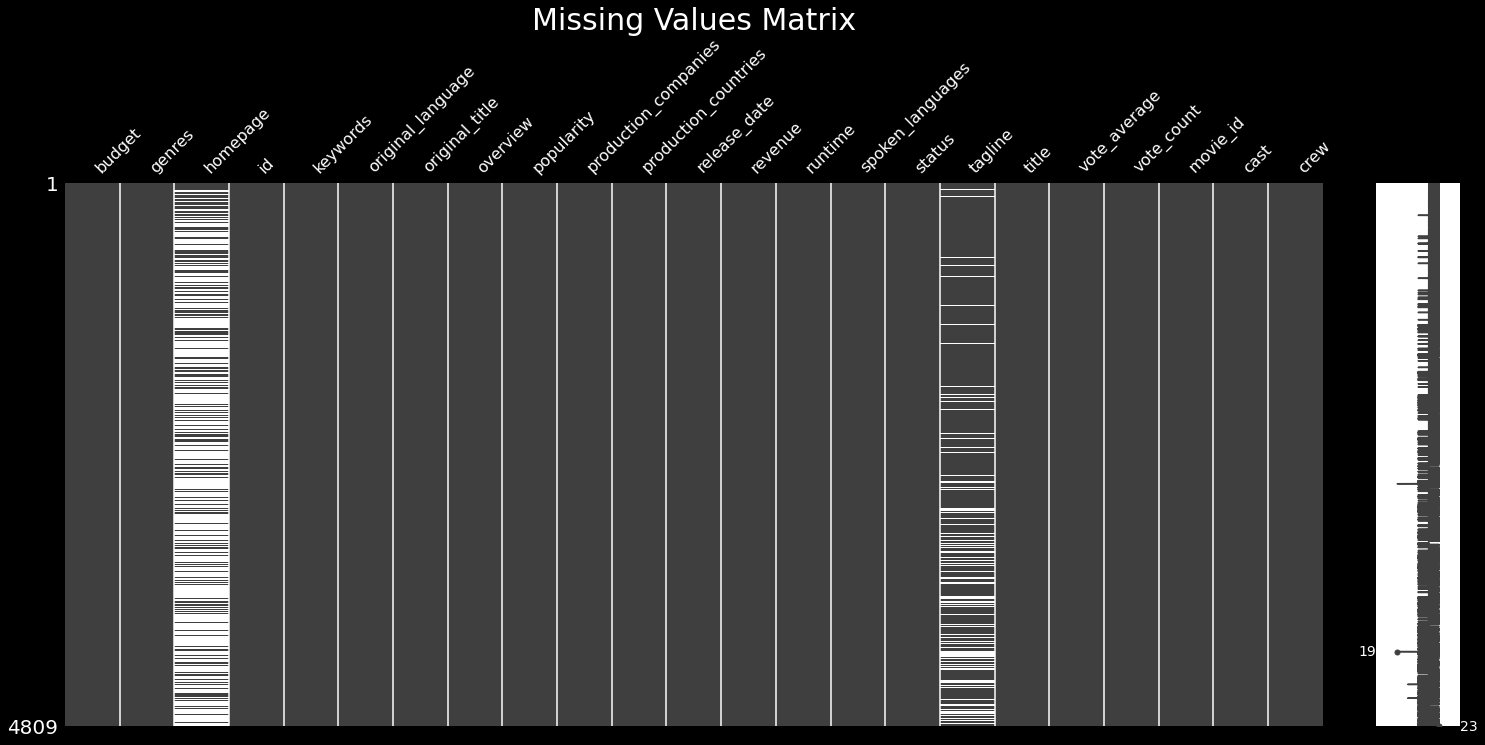

In [6]:
msno.matrix(movies)
plt.title("Missing Values Matrix",fontsize=30)

In [7]:
df = movies

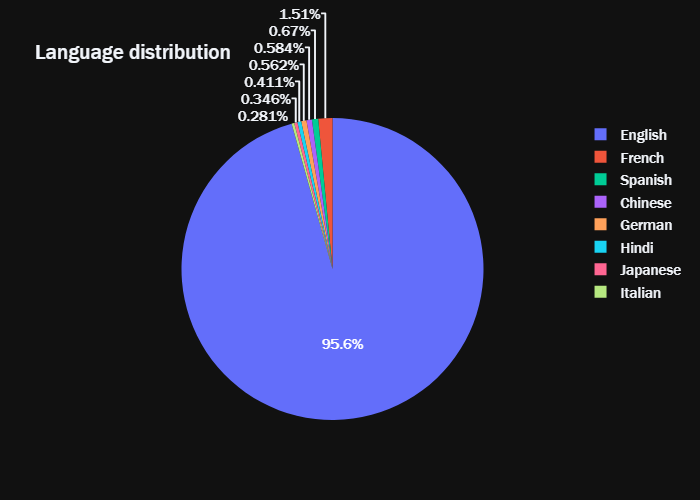

In [44]:
lan_count=movies.original_language.value_counts()[:8]
lan_fig = px.pie(values=lan_count.values,names=['English','French','Spanish','Chinese','German','Hindi','Japanese','Italian'],template="plotly_dark",title="Language distribution")
lan_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
lan_fig.show(renderer="png")

In [9]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L
df['Company'] = df.production_companies.apply(convert)

In [10]:
df.drop(['homepage','tagline','budget','popularity','status','vote_count'],axis=1,inplace=True)

In [11]:
companies = []
for ele in df.Company:
    companies.extend(ele)
company_count = Counter(companies)
c_count = dict(sorted(company_count.items(),reverse=True, key=lambda item: item[1]))
chart_list = dict(itertools.islice(c_count.items(), 15))

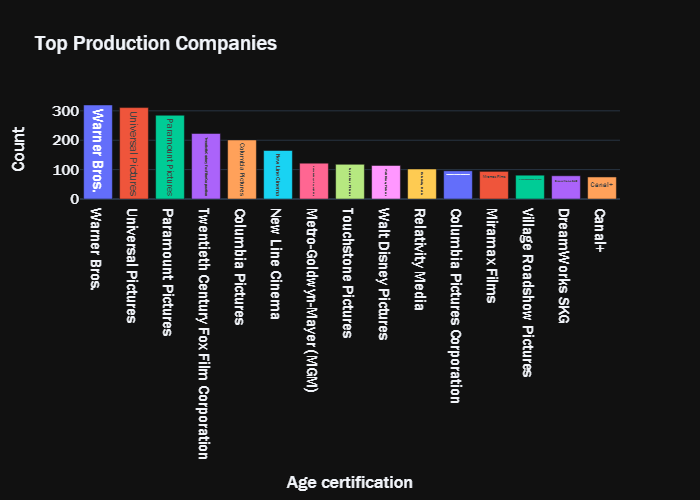

In [12]:
age_fig = px.bar(y=chart_list.values(),x=chart_list.keys(),text=chart_list.keys(),title="Top Production Companies",color=chart_list.keys(),template="plotly_dark")
age_fig.update_layout(xaxis_title="Age certification",yaxis_title="Count")
age_fig.update_layout(showlegend=False)
age_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
age_fig.show(renderer="png")

In [13]:
df['Country'] = df.production_countries.apply(convert)

In [14]:
country_list = []
for ele in df.Country:
    country_list.extend(ele)

Guadaloupe not found in regex
Serbia and Montenegro not found in regex


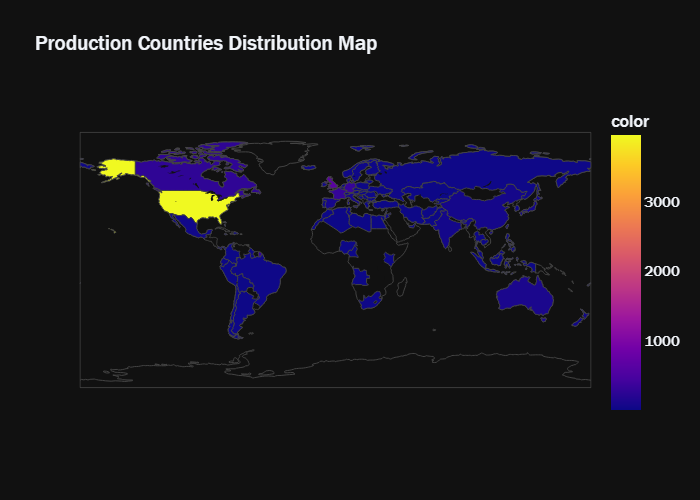

In [15]:
#df.production_countries.str.findall(r"'(\w+?)'").map(lambda x: country_list.extend(x))

country_list = pd.Series(country_list).replace("Lebanon","LB")
country_list = country_list.value_counts()
country_list.index = coco.convert(names=country_list.index, to="ISO3") 

fig = px.choropleth(locations=country_list.index,
                    color=country_list.values,
                    template='plotly_dark',
                    title = 'Production Countries Distribution Map')
fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
fig.show(renderer="png")

In [16]:
df['Year'] = pd.to_datetime(df.release_date).dt.year

In [17]:
df.original_language[0]

'en'

In [18]:
def convert2(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['iso_639_1']) 
    return L
df['Lang'] = df.spoken_languages.apply(convert2)

In [19]:
df['Langplot'] = df.Lang.apply(lambda x:x[-1] if len(x)>0 else np.nan)

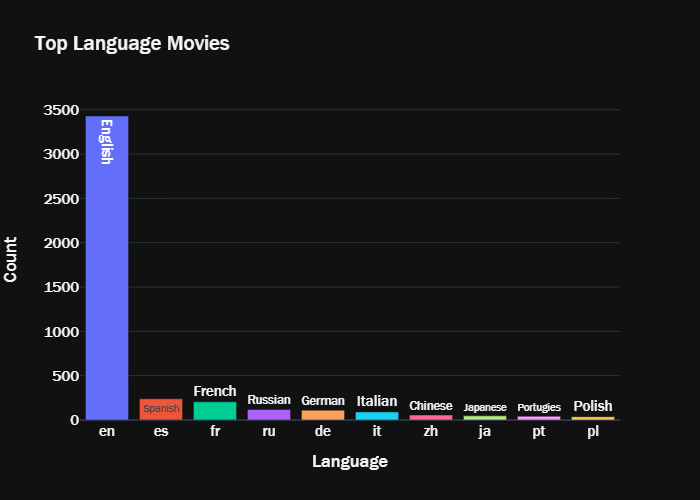

In [20]:
lang_chart = df.Langplot.value_counts().to_dict()
chart_list = dict(itertools.islice(lang_chart.items(), 10))
age_fig = px.bar(y=chart_list.values(),x=chart_list.keys(),text=['English','Spanish','French','Russian','German','Italian','Chinese','Japanese','Portugies','Polish'],title="Top Language Movies",color=chart_list.keys(),template="plotly_dark")
age_fig.update_layout(xaxis_title="Language",yaxis_title="Count")
age_fig.update_layout(showlegend=False)
age_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
age_fig.show(renderer="png")

In [21]:
df.dropna(inplace=True)

In [22]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L
df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)

In [23]:
genreslist = list()
for ele in df.genres:
    genreslist.extend(ele)
top_10_genres = pd.Series(genreslist).value_counts()

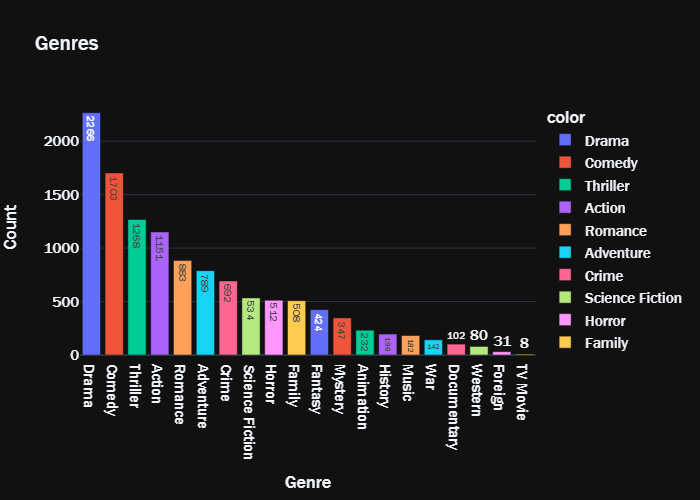

In [24]:
genres_fig = px.bar(y=top_10_genres.values,x=top_10_genres.index,text=top_10_genres,title="Genres",color=top_10_genres.index,template="plotly_dark")
genres_fig.update_layout(xaxis_title="Genre",yaxis_title="Count")
genres_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
genres_fig.show(renderer="png")

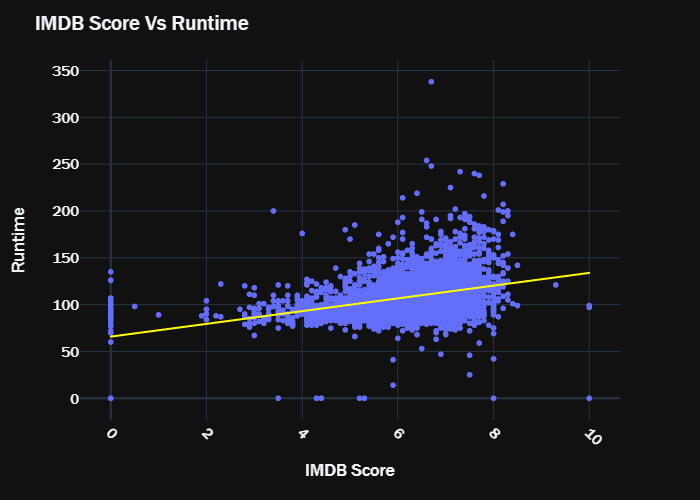

In [25]:
fig = px.scatter(x=df.vote_average,y=df.runtime,trendline='ols',trendline_color_override='yellow')
fig.update_layout(title="IMDB Score Vs Runtime",xaxis_tickangle=45,xaxis_title="IMDB Score",yaxis_title="Runtime")
fig.layout.template = "plotly_dark"
fig.update_layout(font=dict(size = 15,family="Franklin Gothic"))
fig.show(renderer="png")

In [26]:
dfX = df[['title','revenue']].sort_values('revenue',ascending=False)[:15]

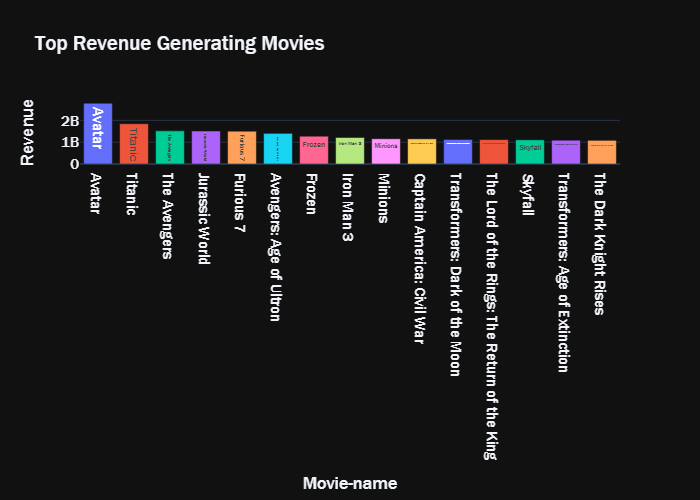

In [27]:
topmov_fig = px.bar(y=dfX.revenue.values,x=dfX.title,text=dfX.title,title="Top Revenue Generating Movies",color=dfX.title,template="plotly_dark")
topmov_fig.update_layout(xaxis_title="Movie-name",yaxis_title="Revenue")
topmov_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
topmov_fig.update_layout(showlegend=False)
topmov_fig.show(renderer="png")

In [28]:
dfX = df[['title','vote_average']].sort_values('vote_average',ascending=False)[:15]

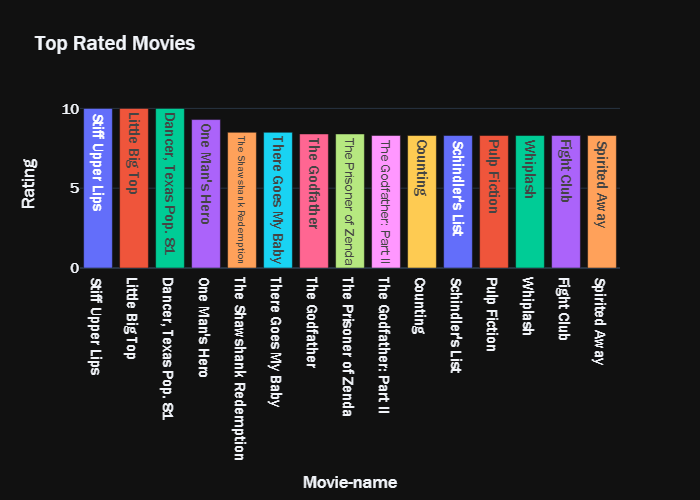

In [29]:
topmov_fig = px.bar(y=dfX.vote_average.values,x=dfX.title,text=dfX.title,title="Top Rated Movies",color=dfX.title,template="plotly_dark")
topmov_fig.update_layout(xaxis_title="Movie-name",yaxis_title="Rating")
topmov_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
topmov_fig.update_layout(showlegend=False)
topmov_fig.show(renderer="png")

In [30]:
df['cast'] = df['cast'].apply(convert)

In [31]:
df['cast'] = df['cast'].apply(lambda x:x[0:5])

In [32]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 
df['crew'] = df['crew'].apply(fetch_director)

In [33]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1
df['cast'] = df['cast'].apply(collapse)
df['crew'] = df['crew'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)

In [34]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [35]:
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

In [36]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew','original_language','original_title','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','vote_average','Company','Country','Year','Lang','Langplot'],axis=1)

In [37]:
new.drop('movie_id',axis=1,inplace=True)

In [38]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(new['tags']).toarray()
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [40]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [41]:
recommend('Iron Man 3')

Iron Man 2
Iron Man
Avengers: Age of Ultron
Captain America: Civil War
X-Men


In [245]:
import pickle
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))